
# Predict the customer churn of a telecom company and find out the key drivers that lead to churn


In [9]:
# Every company wants to increase its revenue and profitability. To do that,while they acquire new customers, they also want to make sure that the existing ones stay with them for a long term. Also, its strategically important to know beforehand whether a set of customers are planning to stop using their services (especially recurring ones like internet, cable, phone etc.). To do that, every company or business creates and tracks customer metrics which are then used to predict their likelihood of churn

## Customer Churn for a company occurs when a customer decides to stop using the services of that company. In this project, we will be using the customer data of a telecom sector company based in the US to predict the probability of churn for each of the customer. We will look at the standard practices that are followed in the industry to solve these problems and also go beyond just those techniques. We have chosen the telecom company data for the churn problem as it is a major area of concern for companies in that sector.

## Once we have built a model, the churn model output can also be used as a warning indicator that some customers are likely to churn. The key drivers that are making the customer more likely to churn can be alleviated and ensure that the customers are actually retained.

* Customer churn, is the percentage of customers who stop doing business with an entity

In [163]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#setting the working directory
os.chdir('C:/Users/deven/Desktop/data/')

In [165]:
#reading the required data files
trainer = pd.read_csv('Telecom_Train.csv')
tester = pd.read_csv('Telecom_Test.csv')

# Exploratory Data Analysis (EDA)

In [167]:
#checking the train to test data ratio
tester.shape[0]/trainer.shape[0]

0.5001500150015001

In [166]:
trainer.shape

(3333, 21)

In [168]:
trainer.dtypes.sort_values()

Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

In [169]:
#checking for missing values
trainer.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [170]:
trainer.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   119
total_night_calls                 120
total_eve_calls                   123
total_intl_charge                 162
total_intl_minutes                162
account_length                    212
total_night_charge                933
total_eve_charge                 1440
total_night_minutes              1591
total_eve_minutes                1611
total_day_minutes                1667
total_day_charge                 1667
Unnamed: 0                       3333
dtype: int64

In [171]:
trainer.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [172]:
#Creating a function that does all of the above tasks in one go
def get_basic_stats(dfname):
    print("Shape of dataframe is " + str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique().sort_values())
    print("Below are some records in DF")
    print("Below is distribution of numeric variables")
    print(dfname.describe())
    print(dfname.head())

In [13]:
get_basic_stats(trainer)

Shape of dataframe is (3333, 21)
Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object
Below are missing values in each column
Unnamed: 0     

In [173]:
get_basic_stats(tester)

Shape of dataframe is (1667, 21)
Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object
Below are missing values in each column
Unnamed: 0     

In [174]:
#Removing the junk column
trainer = trainer.drop(['Unnamed: 0'], axis =1 )
tester = tester.drop(['Unnamed: 0'], axis = 1)

#creating a copy to keep the original dataframes intact
trainer2 = trainer.copy()
tester2 = tester.copy()

In [175]:
#creating binary variables from categorical variables that take just 2 unique values
yes_no_vars = ['churn', 'international_plan', 'voice_mail_plan']

def cat_to_binary(df, varname):
    df[varname + '_num'] = df[varname].apply(lambda x : 1 if x == 'yes' else 0)
    print("checking")
    print(df.groupby([varname + '_num', varname]).size())
    return df


for indexer, varname in enumerate(yes_no_vars):
    trainer2 = cat_to_binary(trainer2, varname)
    tester2 = cat_to_binary(tester2, varname)

checking
churn_num  churn
0          no       2850
1          yes       483
dtype: int64
checking
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
checking
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64
checking
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
checking
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64
checking
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


In [176]:
#dropping object vars that have been converted to numeric
trainer2 = trainer2.drop(yes_no_vars, axis =1)
tester2 = tester2.drop(yes_no_vars, axis =1)

In [177]:
#now we are left with just 2 categorical variables
trainer2.dtypes.sort_values()

voice_mail_plan_num                int64
account_length                     int64
churn_num                          int64
number_vmail_messages              int64
number_customer_service_calls      int64
total_day_calls                    int64
total_intl_calls                   int64
total_eve_calls                    int64
international_plan_num             int64
total_night_calls                  int64
total_intl_charge                float64
total_intl_minutes               float64
total_eve_charge                 float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_night_charge               float64
area_code                         object
state                             object
dtype: object

* Univariate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

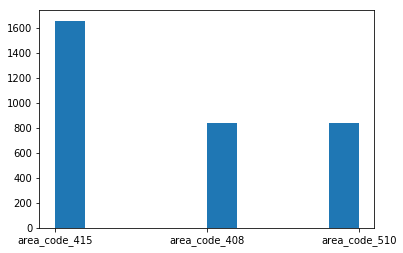

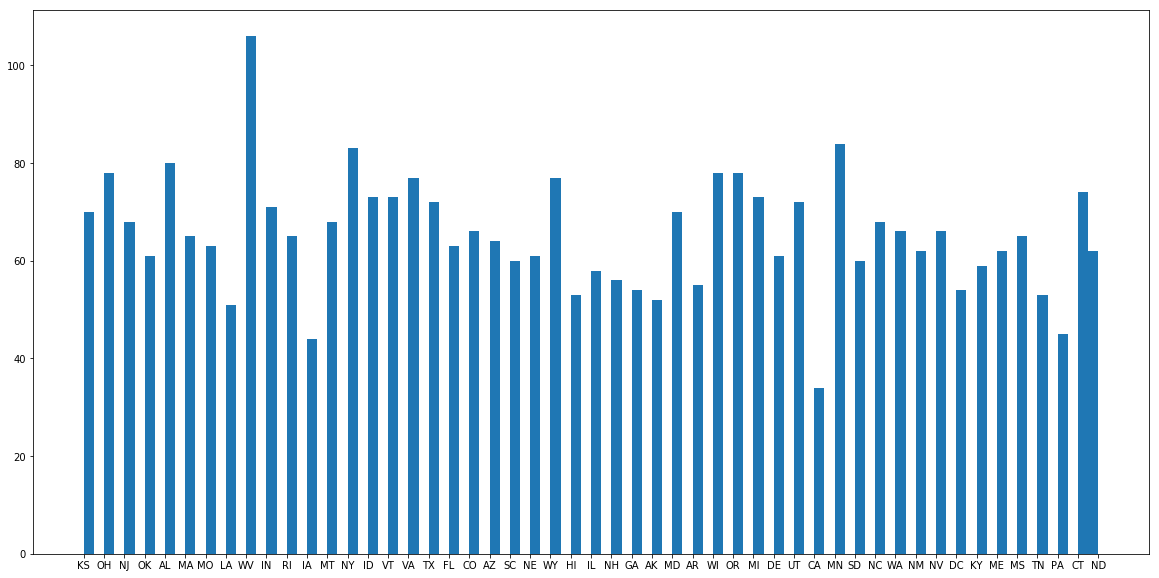

In [178]:
#univariate analysis of categorical variables
plt.hist(list(trainer2['area_code']))
plt.show
plt.figure(figsize = (20,10))
plt.hist(list(trainer2['state']), bins = 100)
plt.show


In [179]:
trainer2.mean()#this is sufficient for univariate analysis of binary variables

account_length                   101.064806
number_vmail_messages              8.099010
total_day_minutes                179.775098
total_day_calls                  100.435644
total_day_charge                  30.562307
total_eve_minutes                200.980348
total_eve_calls                  100.114311
total_eve_charge                  17.083540
total_night_minutes              200.872037
total_night_calls                100.107711
total_night_charge                 9.039325
total_intl_minutes                10.237294
total_intl_calls                   4.479448
total_intl_charge                  2.764581
number_customer_service_calls      1.562856
churn_num                          0.144914
international_plan_num             0.096910
voice_mail_plan_num                0.276628
dtype: float64

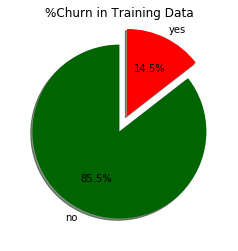

In [20]:
# Visualizing the churn variable
topie = trainer['churn'].value_counts(sort = True)
colorss = ["darkgreen","red"] 
plt.pie(topie,labels = topie.index.values, explode= [0, 0.2],  colors=colorss, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('%Churn in Training Data')
plt.show()

In [180]:
#creating a list of continuous variables, which would be visualized using boxplot
continuous_vars = trainer.select_dtypes([np.number]).columns.tolist()
print(continuous_vars)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


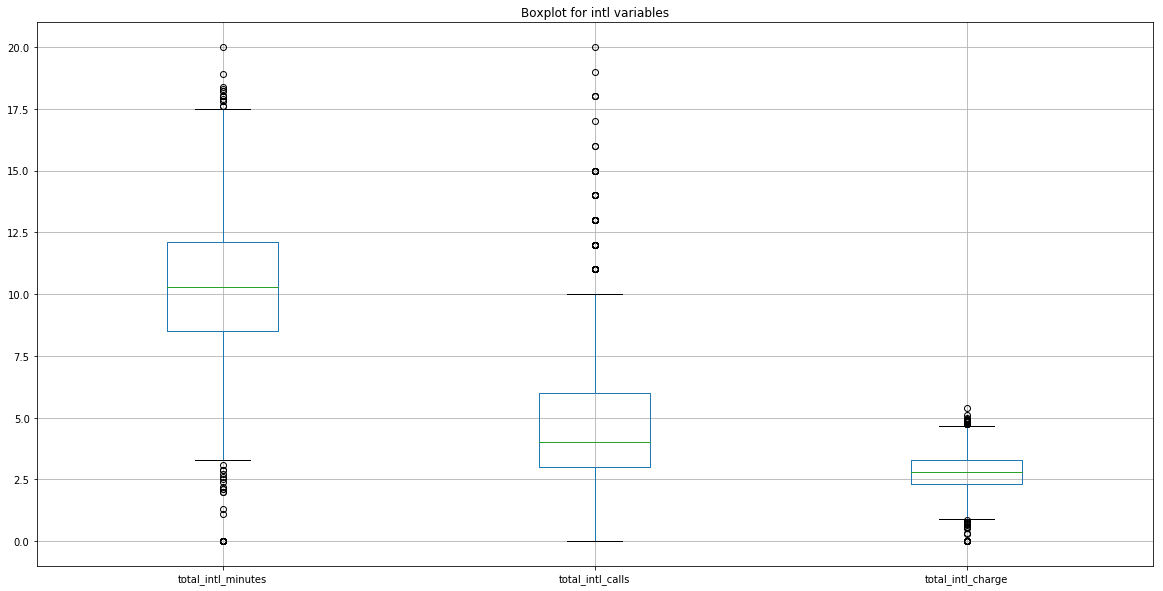

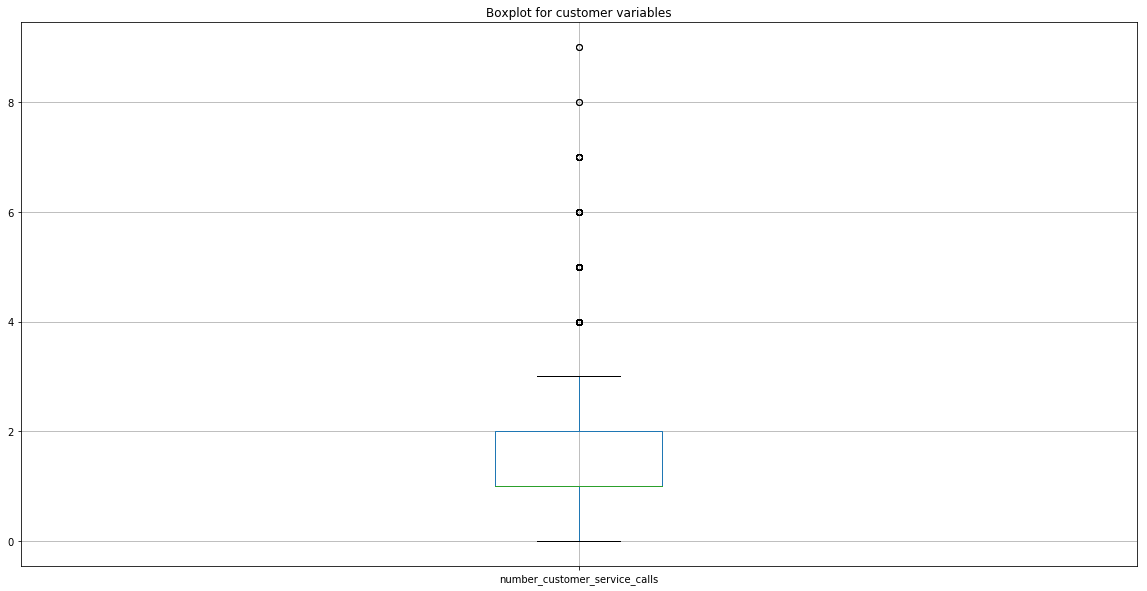

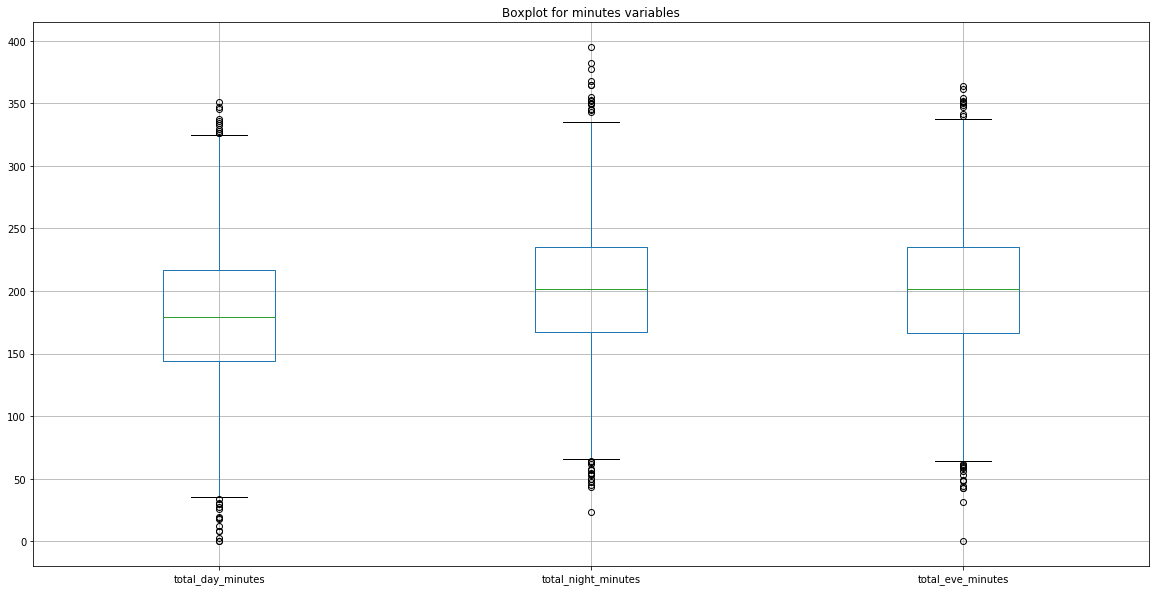

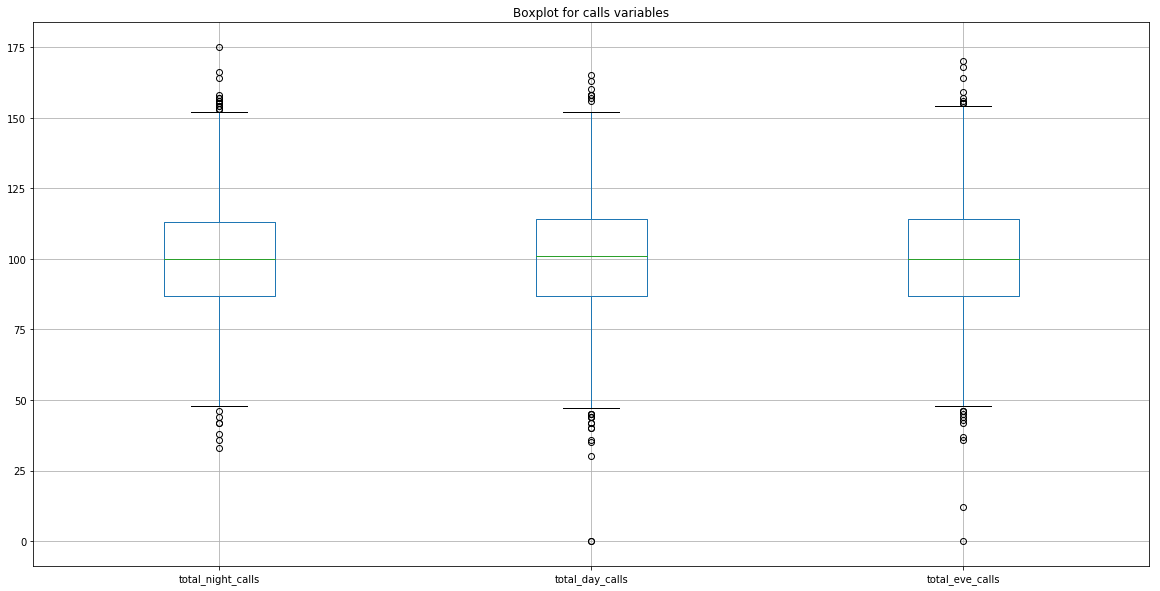

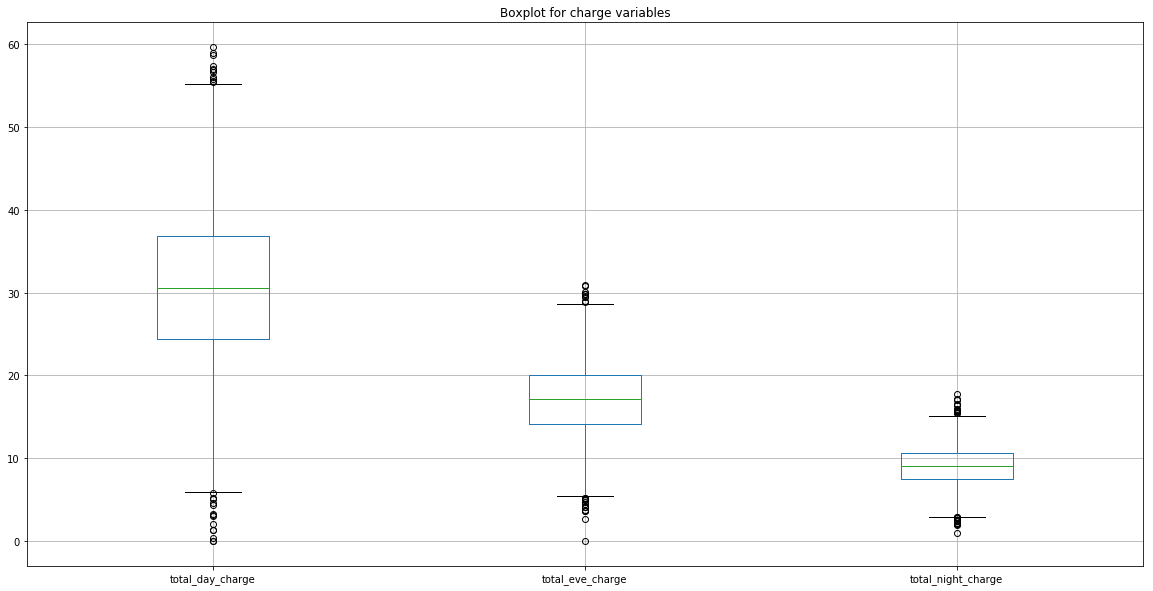

In [181]:
#univariate analysis of continuous variables
type_of_vars = ['intl', 'customer', 'minutes', 'calls', 'charge']
remaining_list = trainer2.columns
for vartype in type_of_vars:
    temp_list = [x for x in remaining_list if vartype in x]
    remaining_list = list(set(remaining_list).difference(set(temp_list)))
    trainer2.boxplot(column=temp_list, figsize = (20,10) )
    plt.title('Boxplot for '+ vartype + ' variables')
    plt.show()

# Feature Creation

['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
count    3333.000000
mean        0.100354
std         0.008440
min         0.066950
25%         0.094893
50%         0.100385
75%         0.106056
max         0.129791
Name: charge_per_minute, dtype: float64
count    1667.000000
mean        0.100772
std         0.008091
min         0.071362
25%         0.095293
50%         0.100634
75%         0.105932
max         0.128430
Name: charge_per_minute, dtype: float64


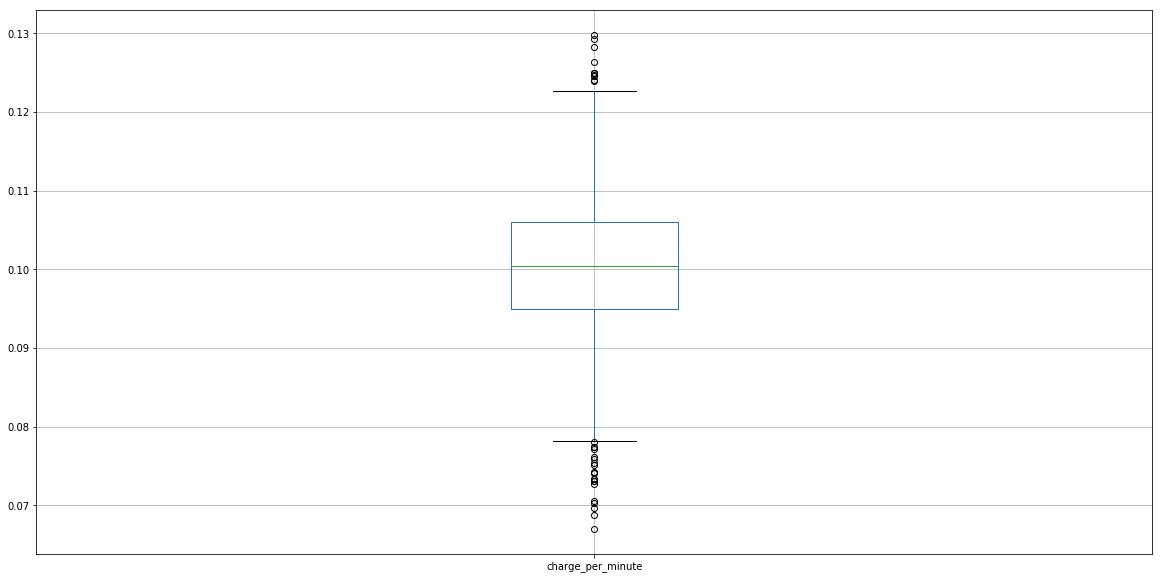

In [23]:
#Creating a charge per minute variable..in both dataframes
#Intuitively, we expect customer with high value of this variable to have higher churn rate
charge_vars = [x for x in trainer.columns if 'charge' in x]
minutes_vars = [x for x in trainer.columns if 'minutes' in x]
print(charge_vars)
print(minutes_vars)

def create_cpm(df):
    df['total_charges'] = 0
    df['total_minutes'] = 0
    for indexer in range(0, len(charge_vars)):
        df['total_charges'] +=  df[charge_vars[indexer]]
        df['total_minutes'] +=  df[minutes_vars[indexer]]
    df['charge_per_minute'] = np.where(df['total_minutes'] >0, df['total_charges']/df['total_minutes'], 0)
    df.drop(['total_minutes', 'total_charges' ], axis = 1, inplace = True)
    print(df['charge_per_minute'].describe())
    return df


trainer2 = create_cpm(trainer2)
tester2 = create_cpm(tester2)

trainer2.boxplot(column='charge_per_minute', figsize = (20,10) )

- Bi-variate Analysis

In [ ]:
X = trainer2.drop('churn_num', axis=1)

In [24]:
all_corr = X.corr().unstack().reset_index()
corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table.head(10)#total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, voice_mail_plan_num
#these 5 variables can be dropped

C:\Users\deven\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,var1,var2,corr_value,corr_abs
42,total_day_minutes,total_day_charge,1.000000,1.000000
102,total_eve_minutes,total_eve_charge,1.000000,1.000000
162,total_night_minutes,total_night_charge,0.999999,0.999999
222,total_intl_minutes,total_intl_charge,0.999993,0.999993
324,voice_mail_plan_num,number_vmail_messages,0.956927,0.956927
56,total_day_minutes,charge_per_minute,0.779747,0.779747
94,total_day_charge,charge_per_minute,0.779747,0.779747
208,total_night_charge,charge_per_minute,-0.569728,0.569728
170,total_night_minutes,charge_per_minute,-0.569703,0.569703
319,international_plan_num,churn_num,0.259852,0.259852


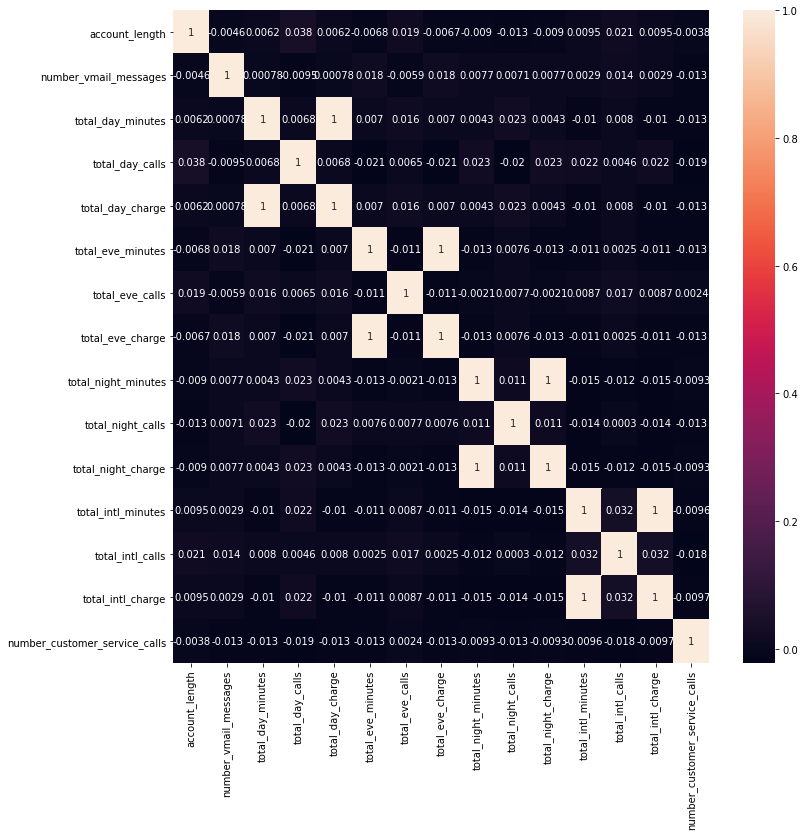

In [25]:
#creating a heat map to see the degree of correlation visually
plt.figure(figsize=(12, 12))
vg_corr = trainer2[continuous_vars].corr()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values,yticklabels = vg_corr.columns.values, annot = True)

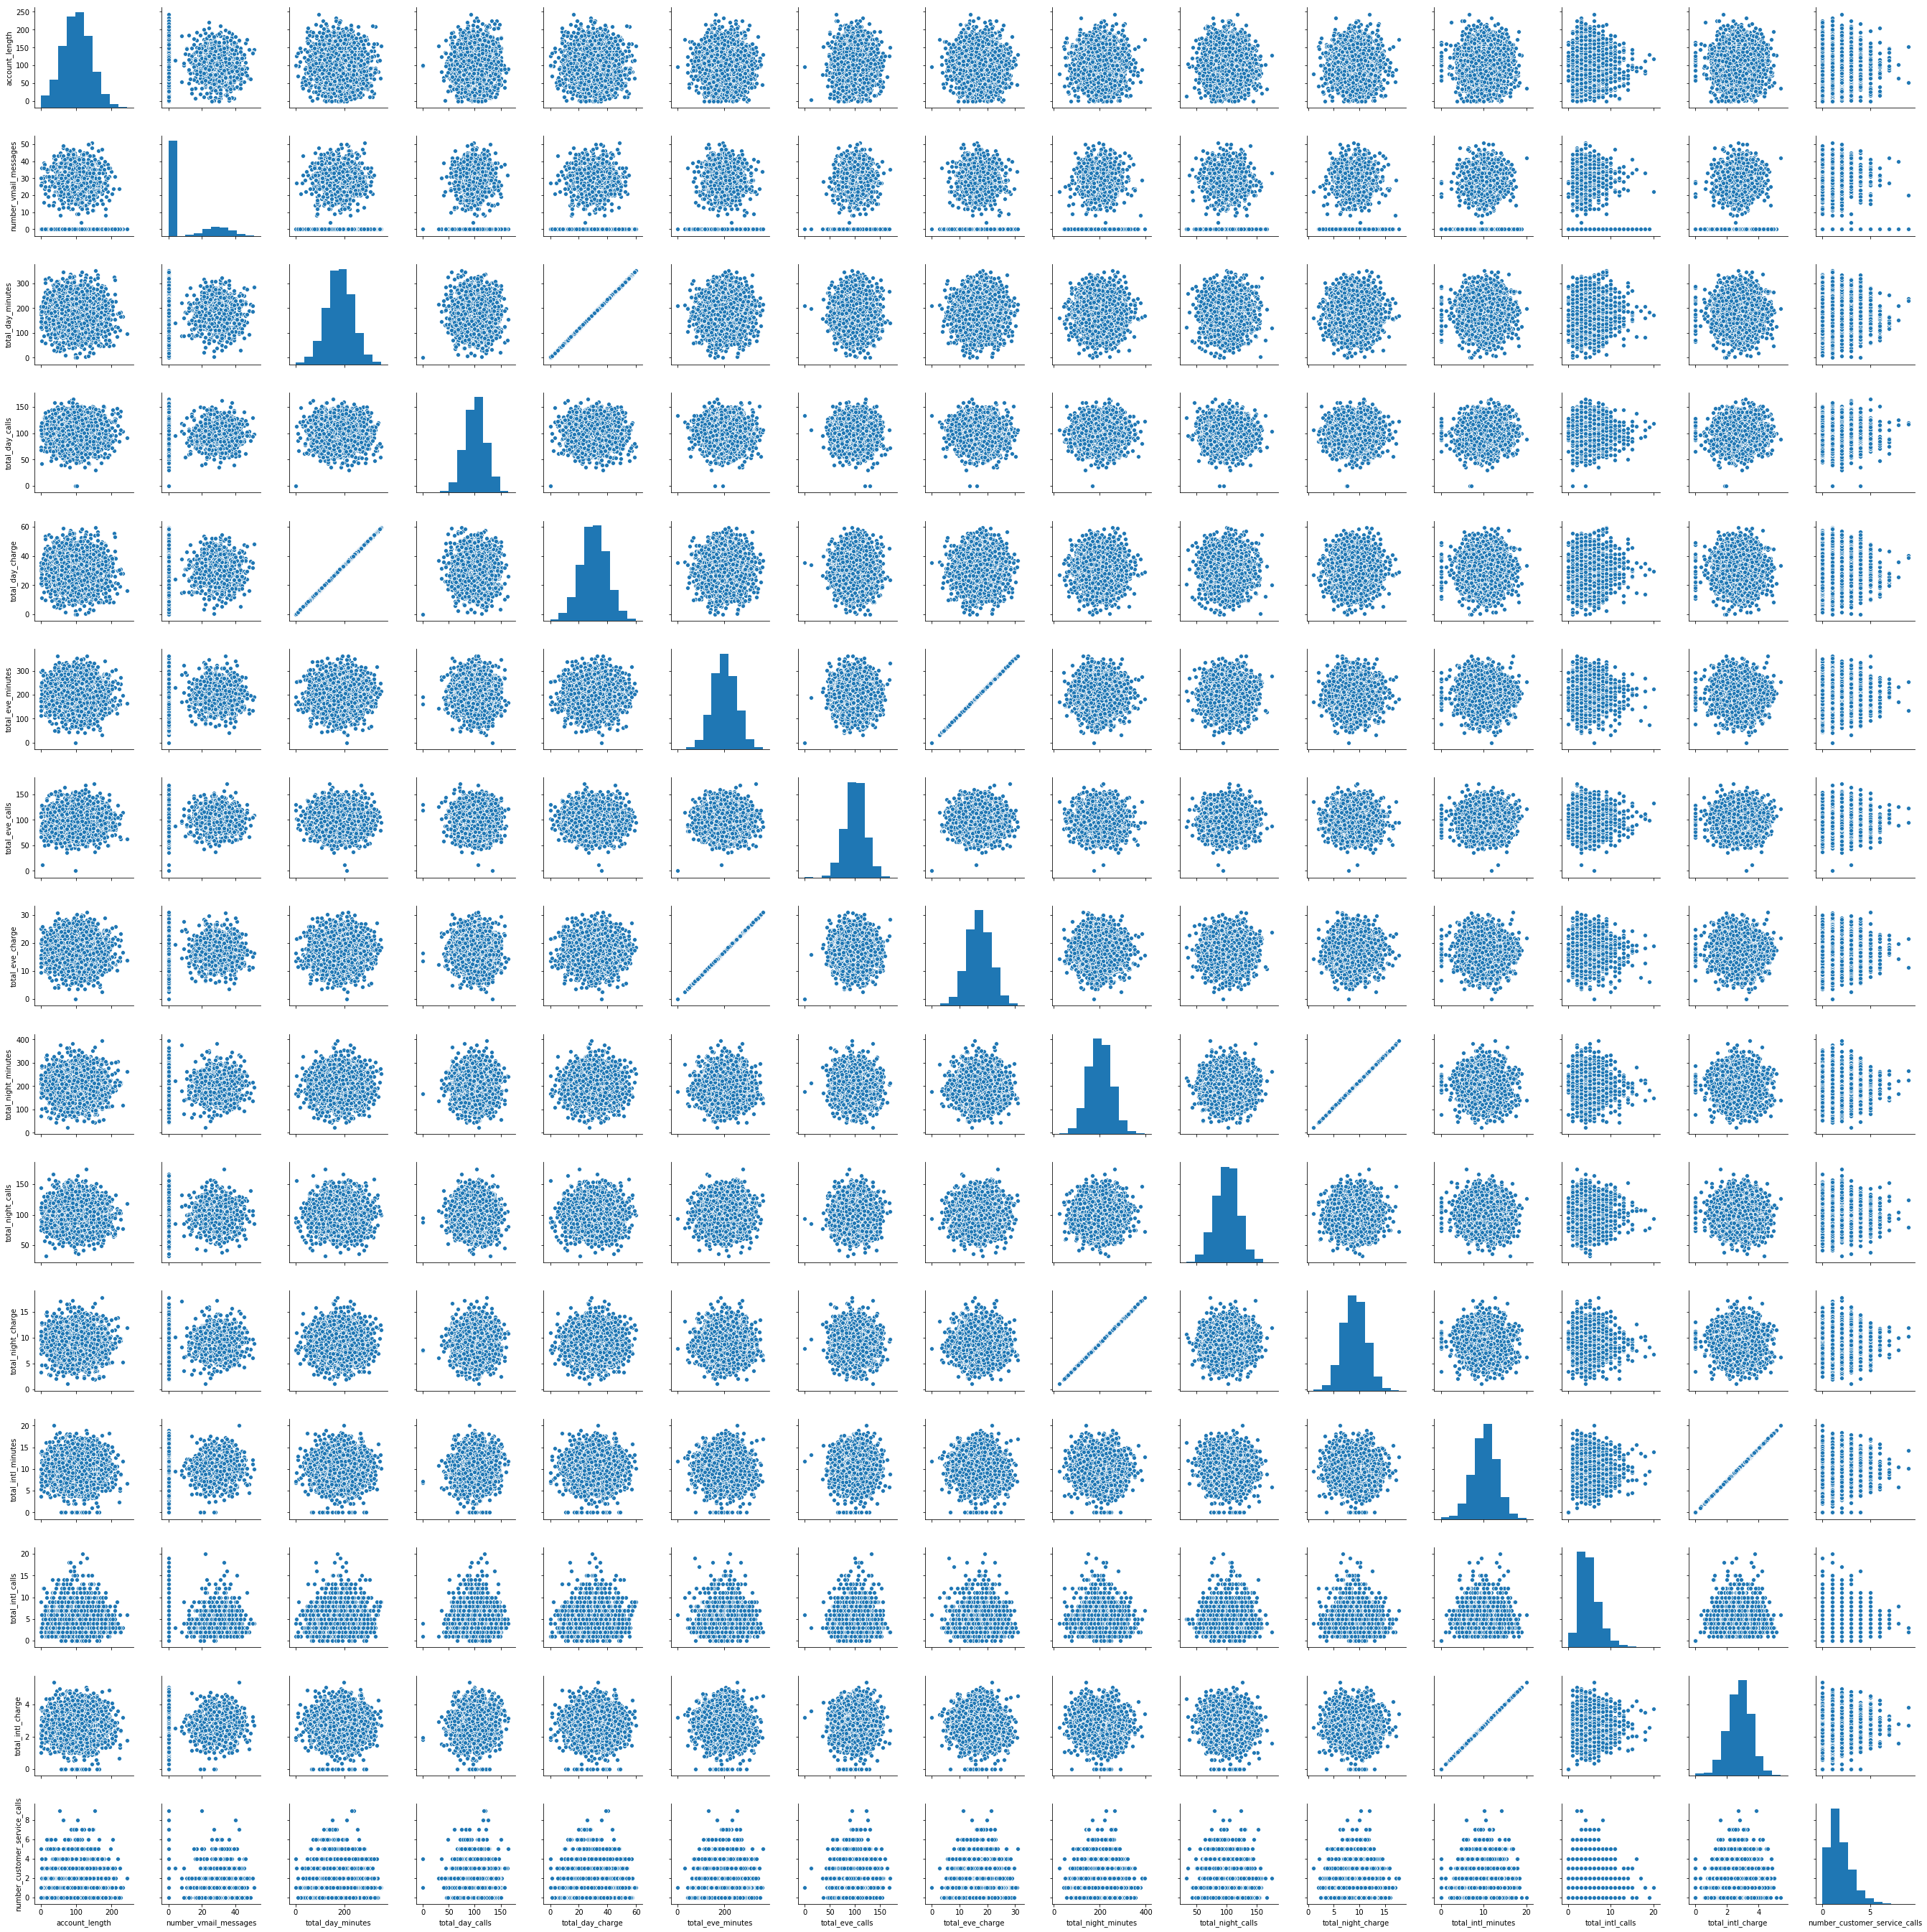

In [26]:
# PLotting each variable against the other..the diagonals show the histogram
sns.pairplot(trainer2[continuous_vars])#, hue = trainer['churn_num']

* Plotting predictor trends with dependent variable 

C:\Users\deven\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


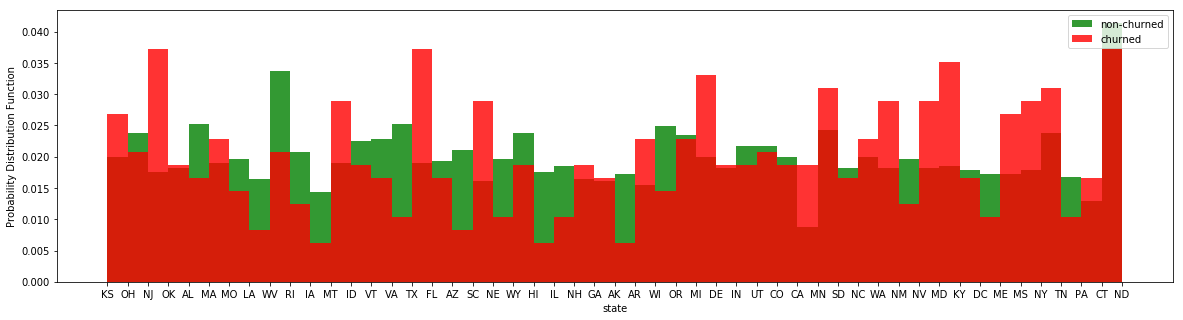

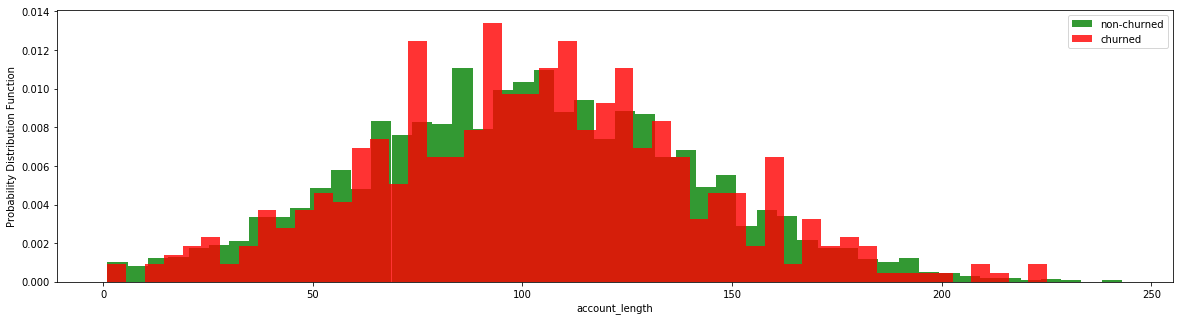

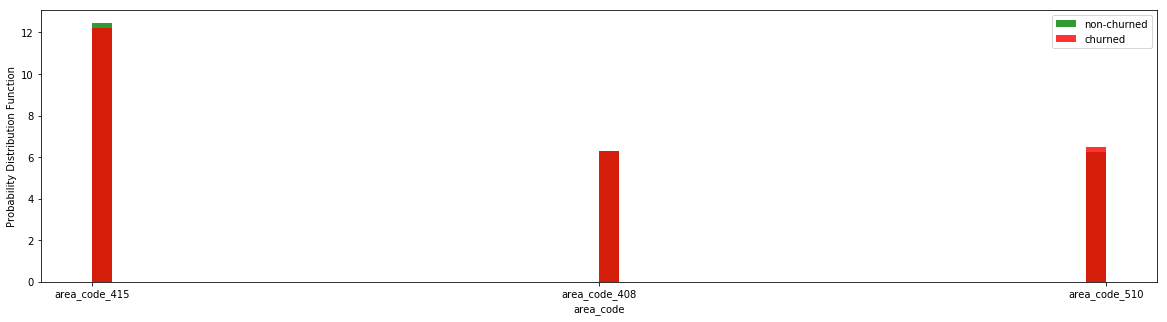

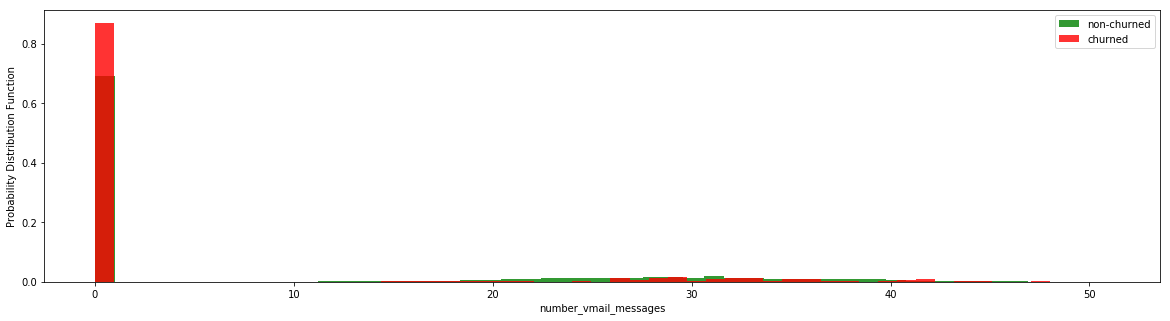

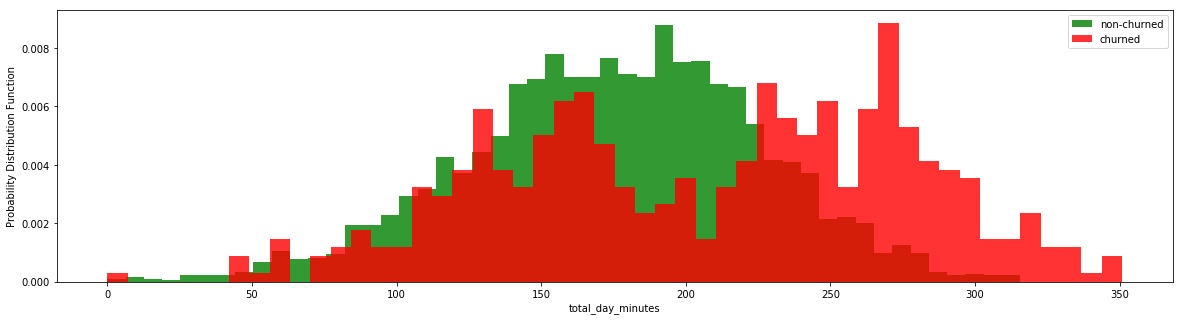

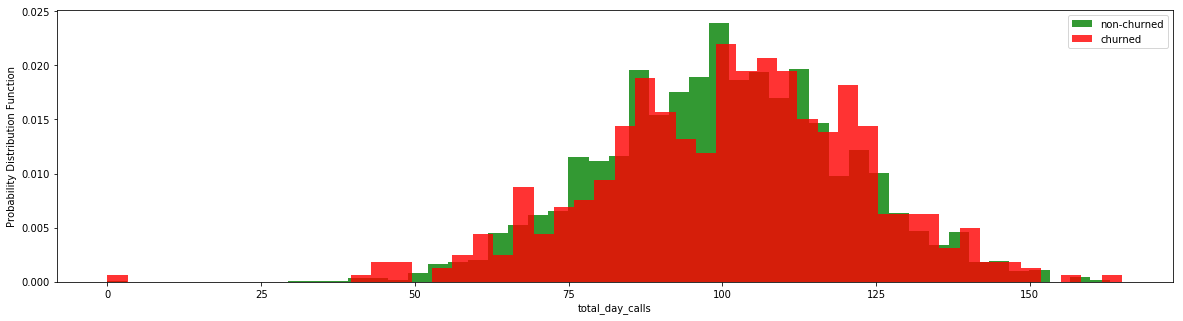

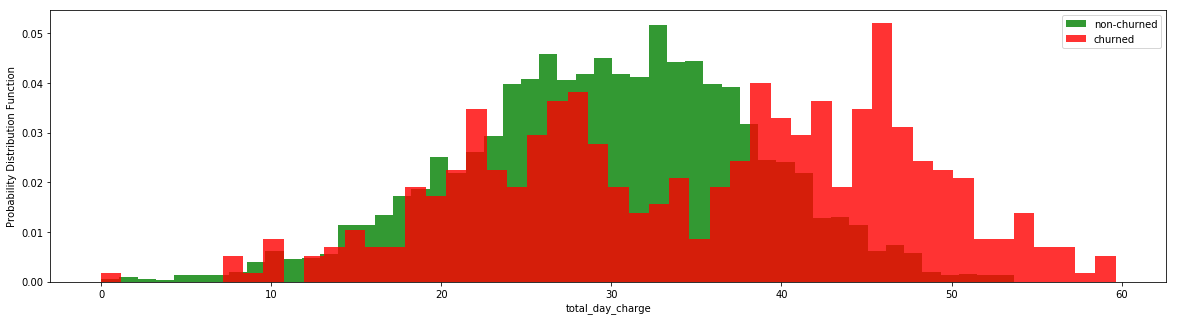

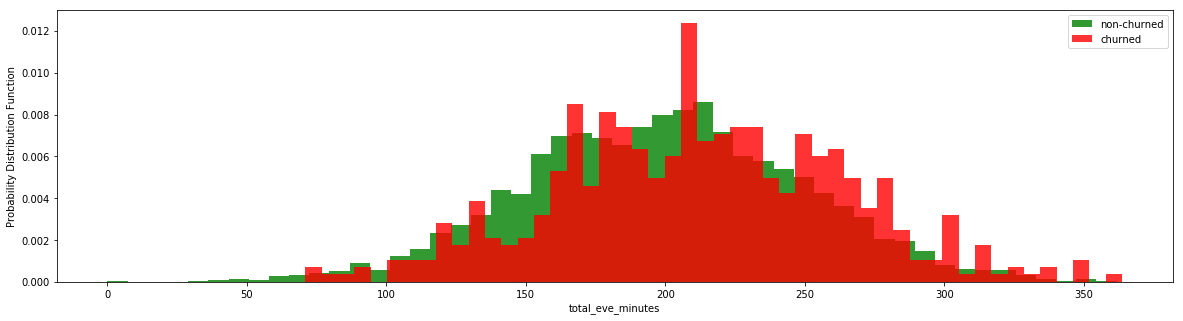

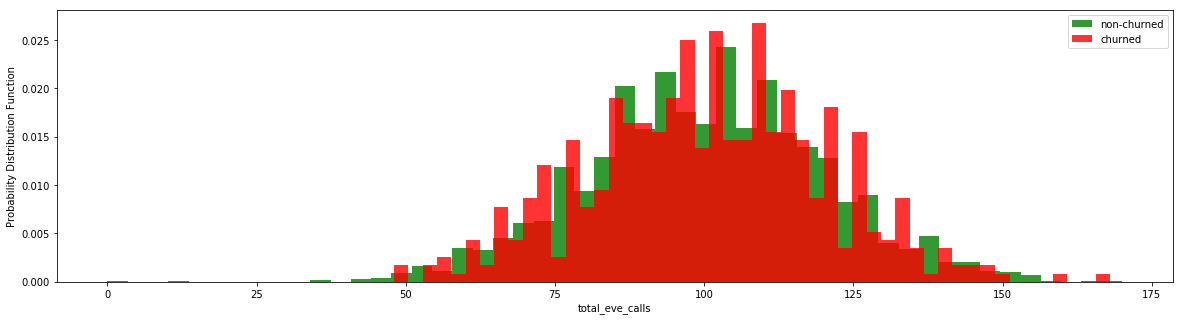

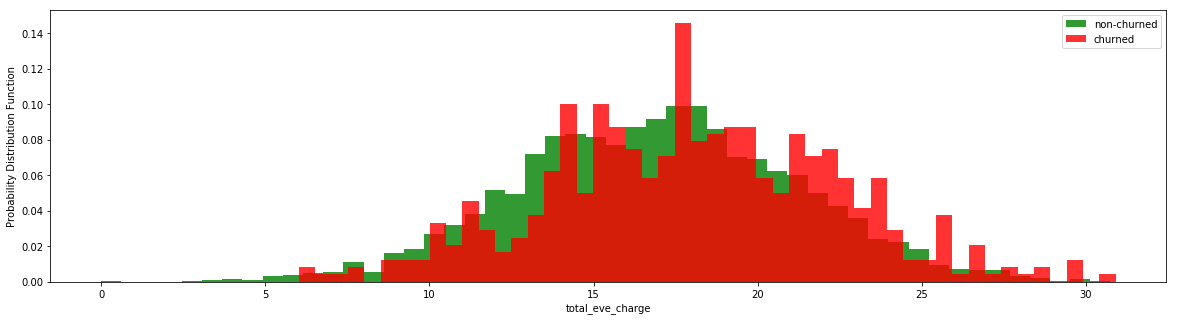

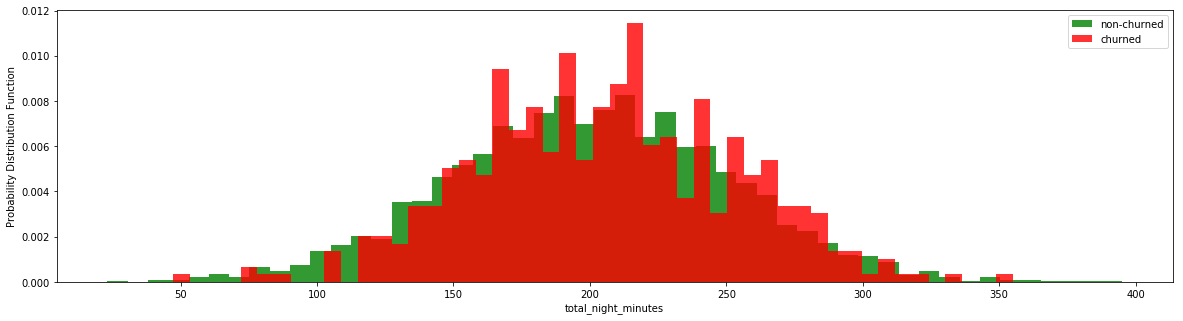

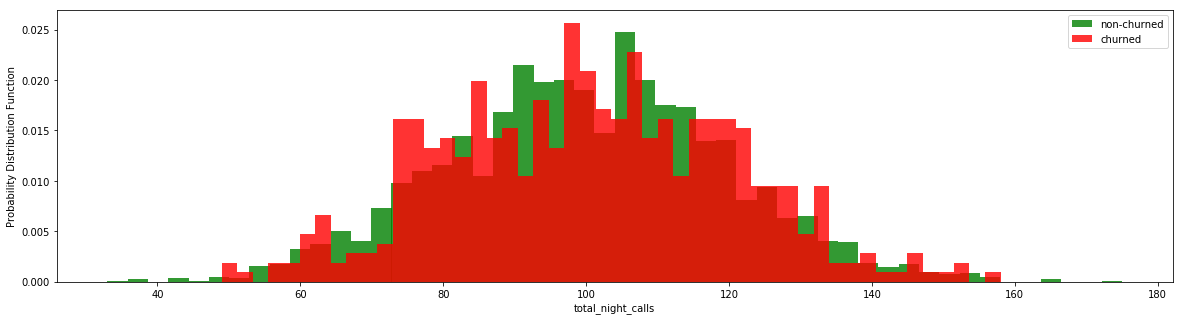

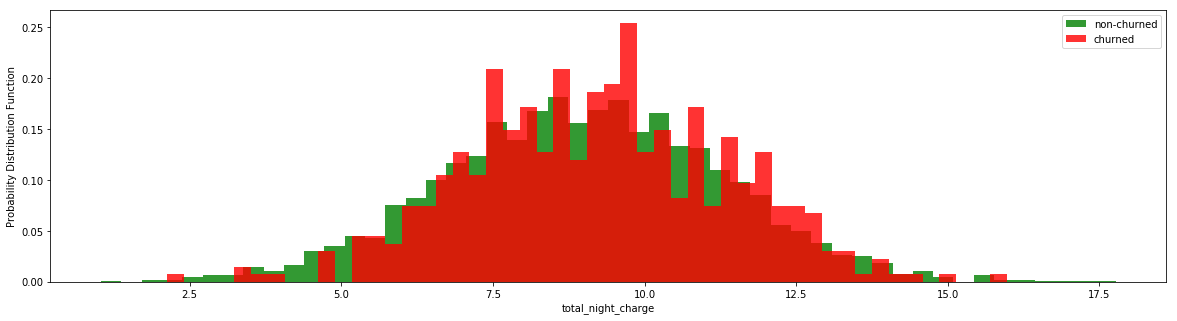

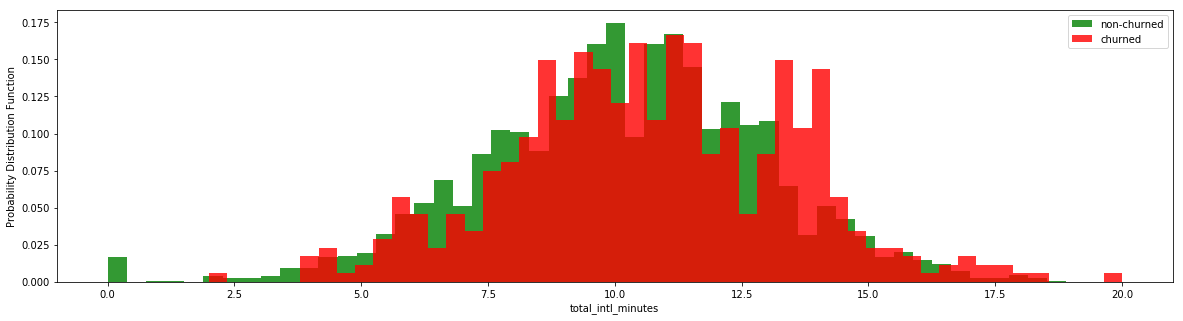

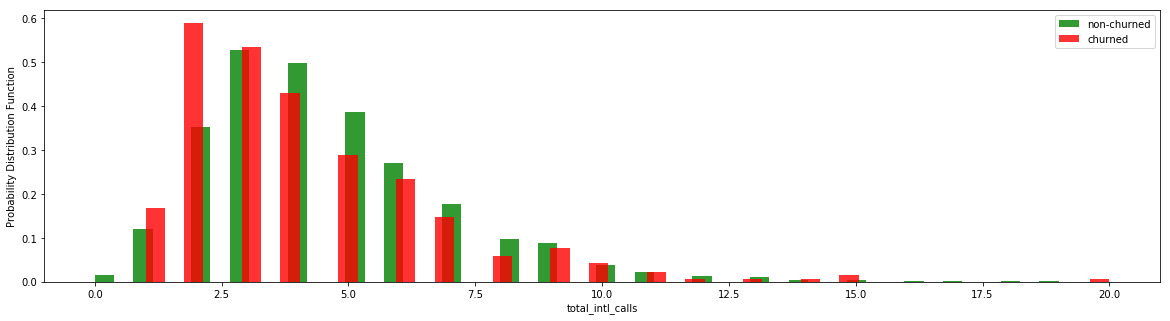

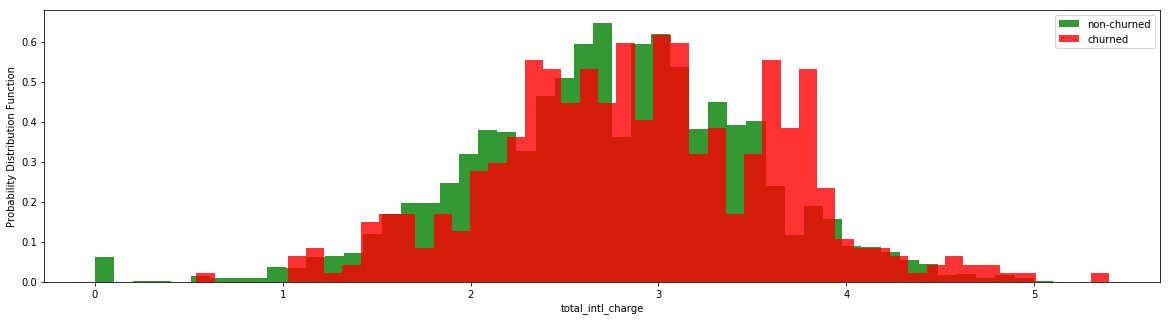

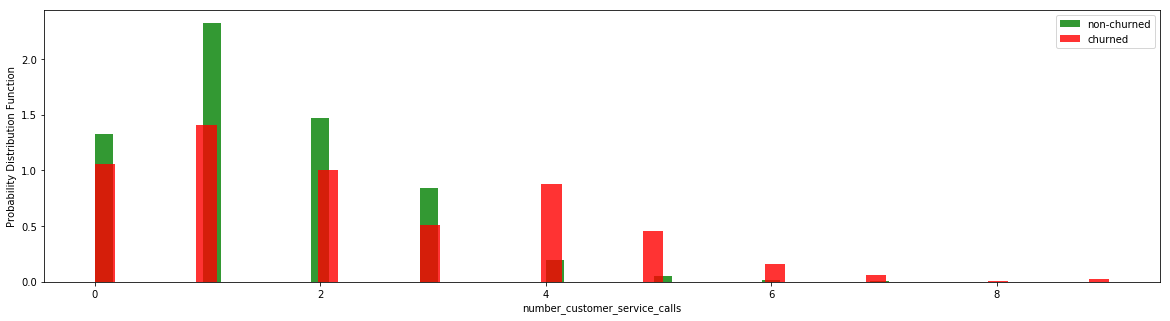

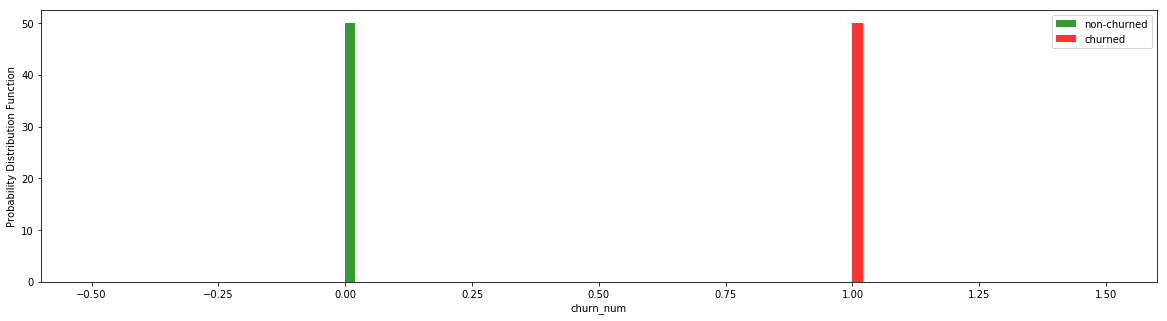

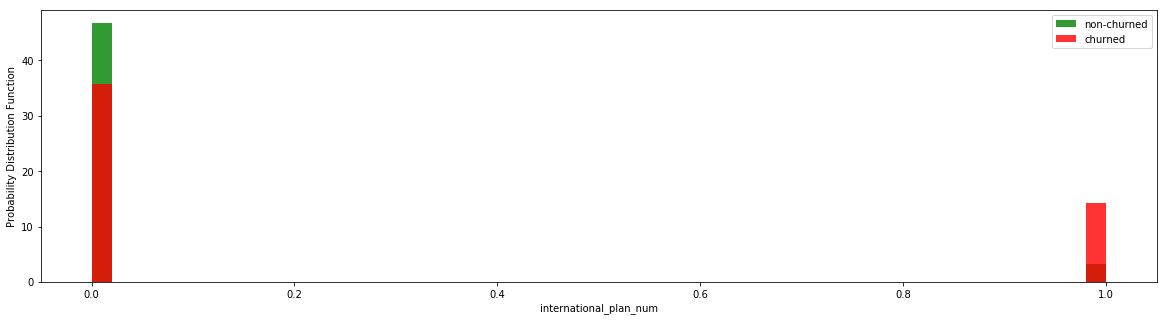

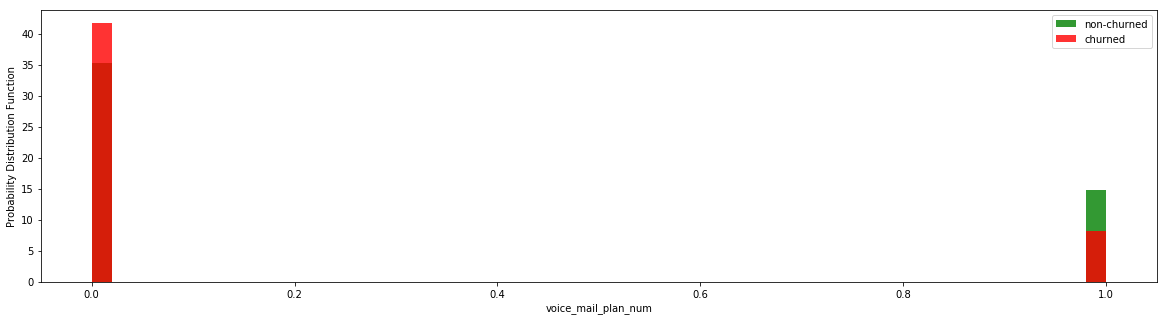

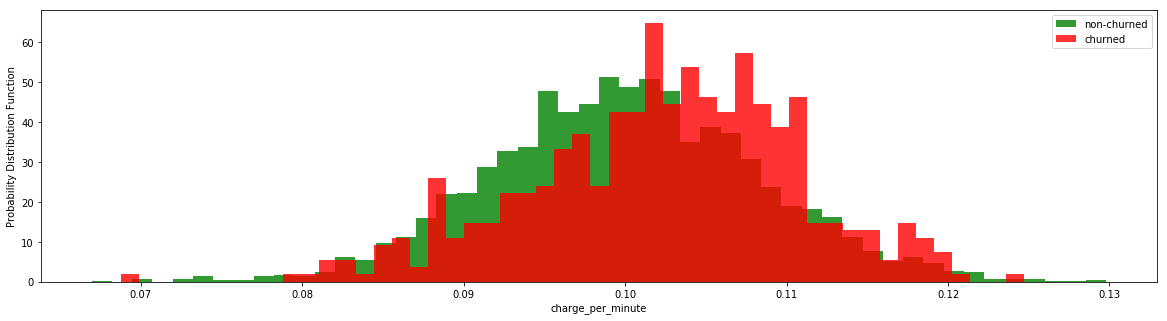

In [27]:
# Plotting PDF of all variables based on Churn..
def create_pdf(df, varname):
    plt.figure(figsize=(20,5))
    plt.hist(list(df[df['churn_num'] == 0 ][varname]), bins = 50, label = 'non-churned', density = True, color = 'g', alpha = 0.8)
    plt.hist(list(df[df['churn_num'] == 1 ][varname]), bins = 50, label = 'churned', density = True, color = 'r', alpha = 0.8)
    plt.legend(loc='upper right')
    plt.xlabel(varname)
    plt.ylabel('Probability Distribution Function')
    plt.show

for varname in trainer2.columns:
    create_pdf(trainer2, varname)


In [28]:
#we have identified 5 variables that can be dropped
drop_after_corr = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'voice_mail_plan_num']
trainer3 = trainer2.drop(drop_after_corr, axis=1)
tester3 = tester2.drop(drop_after_corr, axis=1)


In [29]:
#doing ohe of the 2 categorical varables 
cat_columns = ['state', 'area_code']
trainer3 = pd.concat([trainer3, pd.get_dummies(trainer3[cat_columns], drop_first=True)], axis=1)
tester3 = pd.concat([tester3, pd.get_dummies(tester3[cat_columns], drop_first=True)], axis=1)
trainer3 = trainer3.drop(cat_columns, axis = 1)
tester3 = tester3.drop(cat_columns, axis = 1)


In [30]:
print(trainer3.shape)
print(tester3.shape)

(3333, 66)
(1667, 66)


# Modeling and Performance

In [31]:
X_train = trainer3.drop('churn_num',axis=1)
Y_train = trainer3['churn_num']
X_test = tester3.drop('churn_num', axis = 1)
Y_test = tester3['churn_num'] 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, average_precision_score, f1_score, confusion_matrix, roc_auc_score,auc, accuracy_score, log_loss, roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Logistic Regression with hyper-parameter tuning
lr=LogisticRegression(random_state=42, solver='liblinear')
param_gridd = { 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 2, 3, 5]}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_gridd, cv= 5)#do this with 5 folds
CV_lr.fit(X_train, Y_train)
lr_best = CV_lr.best_estimator_

In [34]:
lr_best

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
test_score_lr = lr_best.predict_proba(X_test)[:, 1]
pd.Series(test_score_lr).describe()

count    1667.000000
mean        0.146750
std         0.170206
min         0.001239
25%         0.036849
50%         0.079398
75%         0.189044
max         0.988498
dtype: float64

In [36]:
# Gradient Boosting with hyper-parameter tuning
gbr=GradientBoostingClassifier(random_state=42)
param_grid = { 
'n_estimators': [50, 100, 500], 'max_features': ['auto'], 'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv= 5)
CV_gbr.fit(X_train, Y_train)
gbr_best = CV_gbr.best_estimator_
print(gbr_best)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [37]:
test_score_gbm = gbr_best.predict_proba(X_test)[:, 1]
pd.Series(test_score_gbm).describe()

count    1667.000000
mean        0.129081
std         0.261447
min         0.000514
25%         0.015923
50%         0.024466
75%         0.053498
max         0.999998
dtype: float64

* Performance Comparison of Models

In [38]:
#Area Under ROC and PR curves for LR model
roc_auc = (roc_auc_score(Y_test, test_score_lr, average='macro'))
avg_pre = average_precision_score(Y_test, test_score_lr)
print (roc_auc)
print (avg_pre)


0.8337355212355212
0.46129768289967515


In [39]:
#Area Under ROC and PR curves for GBM model
roc_auc_gbm = (roc_auc_score(Y_test, test_score_gbm, average='macro'))
avg_pre_gbm = average_precision_score(Y_test, test_score_gbm)
print (roc_auc_gbm)
print (avg_pre_gbm)

0.921523859023859
0.8504959294803294


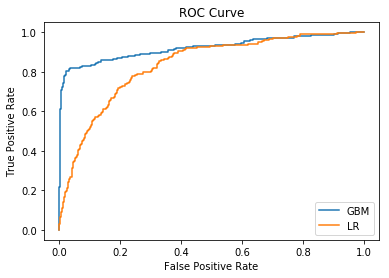

In [40]:
fpr_gbm, tpr_gbm, _ =roc_curve(Y_test, test_score_gbm)
plt.plot(fpr_gbm, tpr_gbm, label ='GBM')
fpr_lr, tpr_lr, _ =roc_curve(Y_test, test_score_lr)
plt.plot(fpr_lr, tpr_lr, label ='LR')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()

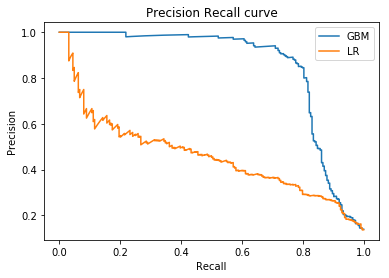

In [44]:
precision_gbm, recall_gbm, _ =precision_recall_curve(Y_test, test_score_gbm)
plt.plot(recall_gbm, precision_gbm, label ='GBM')
precision_lr, recall_lr, _ =precision_recall_curve(Y_test, test_score_lr)
plt.plot(recall_lr, precision_lr, label ='LR')
plt.xlabel('Recall'); 
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend()

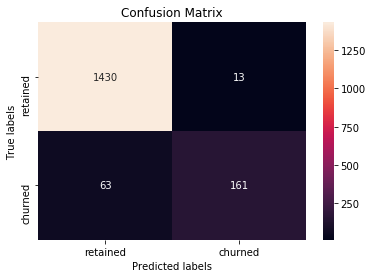

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm = confusion_matrix(Y_test, (test_score_gbm >= 0.5)) 
ax= plt.subplot()
sns.heatmap(cm, annot=True,  ax = ax, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['retained', 'churned']); ax.yaxis.set_ticklabels(['retained', 'churned']);

In [46]:
print(accuracy_score(Y_test, (test_score_lr >= 0.5), normalize=True))
print(accuracy_score(Y_test, (test_score_gbm >= 0.5), normalize=True))

0.8722255548890222
0.9544091181763648


In [ ]:
def get_FI(modelname, dfname):
    feature_importance = pd.DataFrame([X_train.columns.tolist(), gbr_best.feature_importances_ ]).T
    feature_importance.columns = ['varname', 'importance']
    feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)
    feature_importance['cum_importance'] = feature_importance['importance'].cumsum()
    return feature_importance

In [47]:
def get_FI(modelname, dfname):
    importance_list = pd.DataFrame(modelname.feature_importances_, columns=['importance'])
    varnames_list = pd.DataFrame(dfname.columns.tolist(), columns=['feature'])
    feature_importance = pd.concat([varnames_list, importance_list], axis=1, join_axes=[varnames_list.index])
    feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)
    feature_importance['cum_importance'] = feature_importance['importance'].cumsum()
    return feature_importance

get_FI(gbr_best, X_train)

,feature,importance,cum_importance
2,total_day_minutes,2.699439e-01,0.269944
10,number_customer_service_calls,1.595238e-01,0.429468
4,total_eve_minutes,1.353304e-01,0.564798
8,total_intl_minutes,1.062870e-01,0.671085
11,international_plan_num,8.599530e-02,0.757080
1,number_vmail_messages,8.297015e-02,0.840051
9,total_intl_calls,8.083086e-02,0.920881
12,charge_per_minute,1.654483e-02,0.937426
6,total_night_minutes,1.623431e-02,0.953661
3,total_day_calls,6.703489e-03,0.960364


# Recursive Feature Elimination

In [48]:
state_vars = [x for x in X_train.columns if 'state' in x]
area_vars = [x for x in X_train.columns if 'area' in x]
rfe_vars = state_vars + area_vars
print(len(rfe_vars))
X_train_rfe = X_train.drop(rfe_vars, axis=1 ) 
X_test_rfe = X_test.drop(rfe_vars, axis=1)
X_test_rfe.shape

52


(1667, 13)

In [49]:
# Gradient Boosting on reduced feature set
gbr=GradientBoostingClassifier(random_state=42)
param_grid = { 
'n_estimators': [50, 100, 500], 'max_features': ['auto'], 'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv= 5)
CV_gbr.fit(X_train_rfe, Y_train)
gbr_best_rfe = CV_gbr.best_estimator_
print(gbr_best_rfe)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [50]:
test_score_rfe = gbr_best_rfe.predict_proba(X_test_rfe)[:, 1]
print(pd.Series(test_score_rfe).describe())
roc_auc_gbm = (roc_auc_score(Y_test, test_score_rfe, average='macro'))
avg_pre_gbm = average_precision_score(Y_test, test_score_rfe)
print (roc_auc_gbm)
print (avg_pre_gbm)


count    1667.000000
mean        0.127610
std         0.260760
min         0.001585
25%         0.015216
50%         0.024144
75%         0.052756
max         0.999968
dtype: float64
0.9246176121176121
0.8531471306726536


In [51]:
FI = get_FI(gbr_best_rfe, X_train_rfe)
print(FI)

                          feature  importance  cum_importance
2               total_day_minutes    0.272556        0.272556
10  number_customer_service_calls    0.164579        0.437135
4               total_eve_minutes    0.142546        0.579681
8              total_intl_minutes    0.103507        0.683188
11         international_plan_num    0.086615        0.769803
1           number_vmail_messages    0.085081        0.854883
9                total_intl_calls    0.079327        0.934211
12              charge_per_minute    0.020388        0.954598
6             total_night_minutes    0.018003        0.972601
5                 total_eve_calls    0.007979        0.980580
3                 total_day_calls    0.007224        0.987804
7               total_night_calls    0.006132        0.993935
0                  account_length    0.006065        1.000000


# Key Drivers of Churn

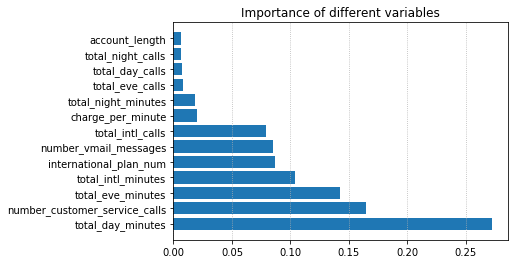

In [52]:
vals = list(FI['importance'])
plt.barh(FI['feature'], FI['importance'])
plt.title('Importance of different variables')
plt.gca().xaxis.grid(linestyle=':')

# Model Implementation

In [67]:
#saving the required files
import pickle
model_columns = list(X_train_rfe.columns)
pickle.dump(gbr_best_rfe, open('model.pkl', 'wb'))
pickle.dump(model_columns, open('model_columns.pkl', 'wb'))


* Run the python code churn_API.py using command prompt and then do the steps below 

In [146]:
import json
import requests
churn_url = 'http://127.0.0.1:5000' # change to required url

In [158]:
churn_dict = dict(trainer.iloc[1])

In [193]:
churn_dict ={'state': 'OH',
 'account_length': 107,
 'area_code': 'area_code_415',
 'international_plan': 'no',
 'voice_mail_plan': 'yes',
 'number_vmail_messages': 26,
 'total_day_minutes': 161.6,
 'total_day_calls': 123,
 'total_day_charge': 27.47,
 'total_eve_minutes': 195.5,
 'total_eve_calls': 103,
 'total_eve_charge': 16.62,
 'total_night_minutes': 254.4,
 'total_night_calls': 103,
 'total_night_charge': 11.45,
 'total_intl_minutes': 13.7,
 'total_intl_calls': 3,
 'total_intl_charge': 3.7,
 'number_customer_service_calls': 1,
 'churn': 'no'}

In [209]:
#Requesting the API for a result
churn_json = json.dumps(churn_dict)
send_request= requests.post(churn_url, churn_json)
print(send_request)#200 means we got the result, 500 means there was an error in processing
send_request.json()

<Response [200]>


{'results': {'Churn': 'no',
  'Model_score': 0.03430872943300315,
  'cpm': 0.09475367882277672}}

In [184]:
#Checking the above results
train_score_rfe = gbr_best_rfe.predict_proba(X_train_rfe)[:, 1]
results_check = pd.concat([X_train_rfe, pd.Series(train_score_rfe, name = 'model_score')], axis=1)
results_check.iloc[1,:]

account_length                   107.000000
number_vmail_messages             26.000000
total_day_minutes                161.600000
total_day_calls                  123.000000
total_eve_minutes                195.500000
total_eve_calls                  103.000000
total_night_minutes              254.400000
total_night_calls                103.000000
total_intl_minutes                13.700000
total_intl_calls                   3.000000
number_customer_service_calls      1.000000
international_plan_num             0.000000
charge_per_minute                  0.094754
model_score                        0.034309
Name: 1, dtype: float64